In [4]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import plotly.express as px
import gif
# pip install gif
# pip install gif[plotly]

In [5]:
df = pd.read_pickle("../data/gp-history_FY1C_decayed_only.pkl.gz","gzip")
df.EPOCH  = pd.to_datetime(df.EPOCH, infer_datetime_format=True)
df = df.set_index(df.EPOCH)
df

,NORAD_CAT_ID,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS
EPOCH,,,,,,,,,,,,,,,,,,,
2007-01-18 08:32:19.177728,29739,2007-01-18 08:32:19.177728,12.249100,0.090476,99.1362,6.1968,139.9516,227.1623,0,U,999,61,0.010265,0.000043,0.0,7949.369,117.559,2290.459,852.009
2007-01-18 14:25:11.770752,29739,2007-01-18 14:25:11.770752,12.249103,0.090433,99.1323,6.3813,139.2657,227.9158,0,U,999,64,0.009570,0.000040,0.0,7949.367,117.559,2290.114,852.350
2007-01-19 21:47:09.622464,29739,2007-01-19 21:47:09.622464,12.249213,0.090440,99.1361,7.3491,136.3640,231.2315,0,U,999,80,0.009357,0.000039,0.0,7949.320,117.558,2290.122,852.248
2007-01-19 11:59:03.153984,29739,2007-01-19 11:59:03.153984,12.249195,0.090462,99.1336,7.0494,137.3094,230.1813,0,U,999,75,0.010271,0.000043,0.0,7949.328,117.558,2290.303,852.082
2007-01-20 21:18:35.578656,29739,2007-01-20 21:18:35.578656,12.249294,0.090618,99.1344,8.0810,134.5451,233.3321,0,U,999,92,0.009318,0.000040,0.0,7949.285,117.557,2291.501,850.799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-11-26 22:37:25.046400,30307,2008-11-26 22:37:25.046400,15.086206,0.008556,99.0066,350.8824,251.6355,107.6933,0,U,999,9676,0.045558,0.008358,0.0,6918.555,95.451,599.612,481.228
2008-11-27 22:29:20.252543,30307,2008-11-27 22:29:20.252543,15.101214,0.008771,99.0074,352.0470,252.2840,106.9247,0,U,999,9691,0.043600,0.008380,0.0,6913.970,95.356,596.481,475.190
2008-12-06 23:21:41.699519,30307,2008-12-06 23:21:41.699519,15.295744,0.008402,98.9981,2.7703,246.8487,112.3881,0,U,999,9828,0.095743,0.034701,0.0,6855.224,94.143,534.684,419.495


In [6]:
first = df.groupby(by=["NORAD_CAT_ID"]).first()
last = df.groupby(by=["NORAD_CAT_ID"]).last()

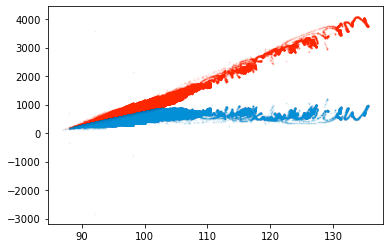

In [7]:
plt.scatter(df.PERIOD, df.APOAPSIS, color='#fe270010', s=1)
plt.scatter(df.PERIOD, df.PERIAPSIS, color='#038fd510', s=1)
plt.show()

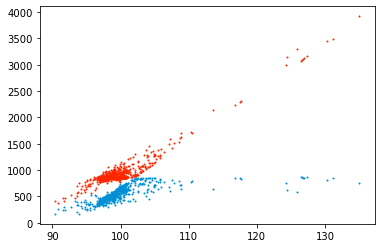

In [8]:
plt.scatter(first.PERIOD, first.APOAPSIS, color='#fe2700ff', s=1)
plt.scatter(first.PERIOD, first.PERIAPSIS, color='#038fd5ff', s=1)
plt.show()

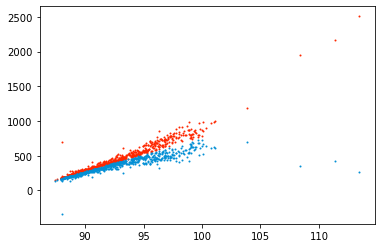

In [9]:
plt.scatter(last.PERIOD, last.APOAPSIS, color='#fe2700ff', s=1)
plt.scatter(last.PERIOD, last.PERIAPSIS, color='#038fd5ff', s=1)
plt.show()

In [10]:
test = df.groupby(['NORAD_CAT_ID']).resample('7D').last()#.interpolate(method='linear', limit=31)
# interpolated linearly, not sure if it makes sense but it's the only option to do it quickly
# due to the limitation on multiindex interpolation.
test = test[["PERIOD","APOAPSIS","PERIAPSIS"]].reset_index()
test = test.set_index(["NORAD_CAT_ID","EPOCH","PERIOD"])
test2 = test.reset_index()
test = test.stack().reset_index().rename(columns={"level_3":"pa",0:"value"})
test['DAY'] = test.EPOCH.astype(int) // 86400000000000
test = test.sort_values(by=["DAY","pa"])

In [11]:
test.EPOCH.value_counts()
# looks like there won't be too many points to plot here but we should see something

2010-01-09    180
2010-01-23    178
2010-08-21    176
2010-09-04    174
2010-09-18    174
             ... 
2019-06-29      2
2018-11-26      2
2019-06-04      2
2019-12-09      2
2018-07-17      2
Name: EPOCH, Length: 4498, dtype: int64

In [12]:
print(test.DAY.min(),test.DAY.max())
print(test.dtypes)

13529 18597
NORAD_CAT_ID             int64
EPOCH           datetime64[ns]
PERIOD                 float64
pa                      object
value                  float64
DAY                      int64
dtype: object


In [13]:
fig = px.scatter(test, x="PERIOD", y="value", color="pa", title='FY1C DEORBITED Debris Gabbard',animation_group="NORAD_CAT_ID", animation_frame="DAY", range_y=[100,3000], range_x=[87,115])
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 200
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 200
fig.show()

KeyboardInterrupt: 

In [32]:
@gif.frame
def plot(i):
    df = test[test.DAY==i]
    fig = px.scatter(df, x="PERIOD", y="value", title='FY1C DEORBITED Debris Gabbard', range_y=[100,1500], range_x=[87,105])
    fig.update_layout(showlegend=False)
    fig.update_xaxes(title="")
    fig.update_yaxes(title="")
    fig.update_layout(width=500, height=300)
    fig['layout'].update(margin=dict(l=0,r=20,b=0,t=55))
    return fig

In [33]:
frames = []
for i in range(test.DAY.min() ,16597,7):
    frame = plot(i)
    frames.append(frame)

gif.save(frames, 'fy1c_dd_2.gif', duration=100)

In [ ]:
plot(13529)

In [ ]:

test2

fig = px.line(test2, x="PERIOD", y="PERIAPSIS", color="NORAD_CAT_ID")
fig.show()

In [21]:
print(test.pa.value_counts())
print(len(test))

PERIAPSIS    121370
APOAPSIS     121370
Name: pa, dtype: int64
242740
